# Sharad Kumar Tiwari
# Task-4 Decision Tree Algorithm

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
iris = pd.read_csv('C:/Users/Asus/Downloads/iris.csv')

iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris.drop(['Id'],axis=1,inplace=True)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Analysis

In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


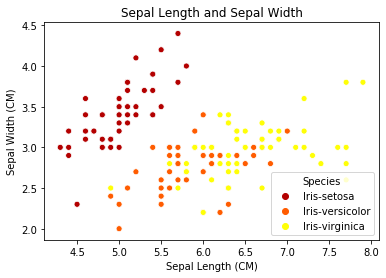

In [6]:
# Relation between Sepal Length and Sepal Width
sns.scatterplot(x='SepalLengthCm',y='SepalWidthCm',hue='Species',data=iris,palette='hot')
plt.xlabel('Sepal Length (CM)')
plt.ylabel('Sepal Width (CM)')
plt.title('Sepal Length and Sepal Width')
plt.show()

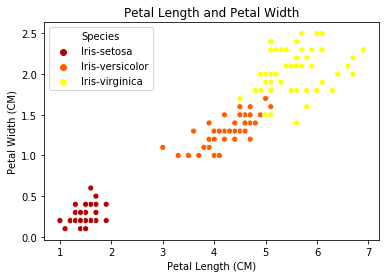

In [7]:
# Relation between Petal Length and Petal Width
sns.scatterplot(x='PetalLengthCm',y='PetalWidthCm',hue='Species',data=iris,palette='hot')
plt.xlabel('Petal Length (CM)')
plt.ylabel('Petal Width (CM)')
plt.title('Petal Length and Petal Width')
plt.show()

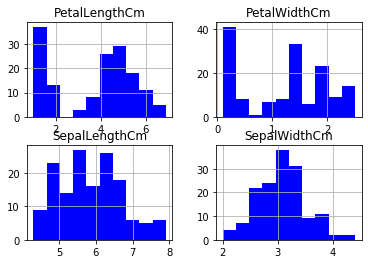

<Figure size 1080x720 with 0 Axes>

In [8]:
# Checking for Distribution
iris.hist(color='blue')
plt.figure(figsize=(15,10))
plt.show()

As we can see,SepalLength and SepalWidth has Gaussian Distribution but PetalLength and PetalWidth are right scewed

In [9]:
import scipy.stats as stat
iris.PetalLengthCm,parameters = stat.boxcox(iris.PetalLengthCm)
iris.PetalWidthCm,parameters = stat.boxcox(iris.PetalWidthCm)

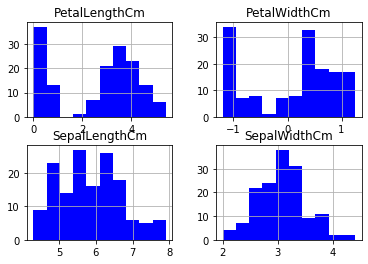

<Figure size 1080x720 with 0 Axes>

In [10]:
# Checking for Distribution
iris.hist(color='blue')
plt.figure(figsize=(15,10))
plt.show()

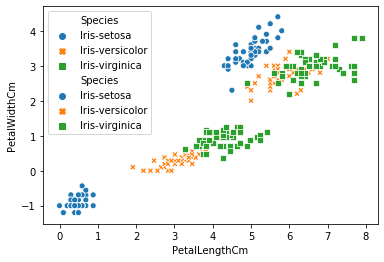

In [11]:
sns.scatterplot(x='SepalLengthCm',y='SepalWidthCm',hue='Species',data=iris,style='Species')
sns.scatterplot(x='PetalLengthCm',y='PetalWidthCm',hue='Species',data=iris,style='Species')
plt.show()

In [12]:
# Checking for Correlation
corr= iris.corr()
corr

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.869076,0.813792
SepalWidthCm,-0.109369,1.000000,-0.425889,-0.400719
PetalLengthCm,0.869076,-0.425889,1.000000,0.969871
PetalWidthCm,0.813792,-0.400719,0.969871,1.000000


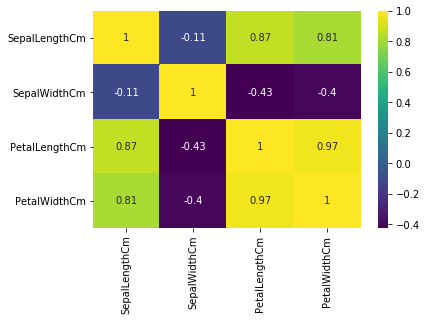

In [13]:
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,cmap='viridis',annot=True)
plt.show()

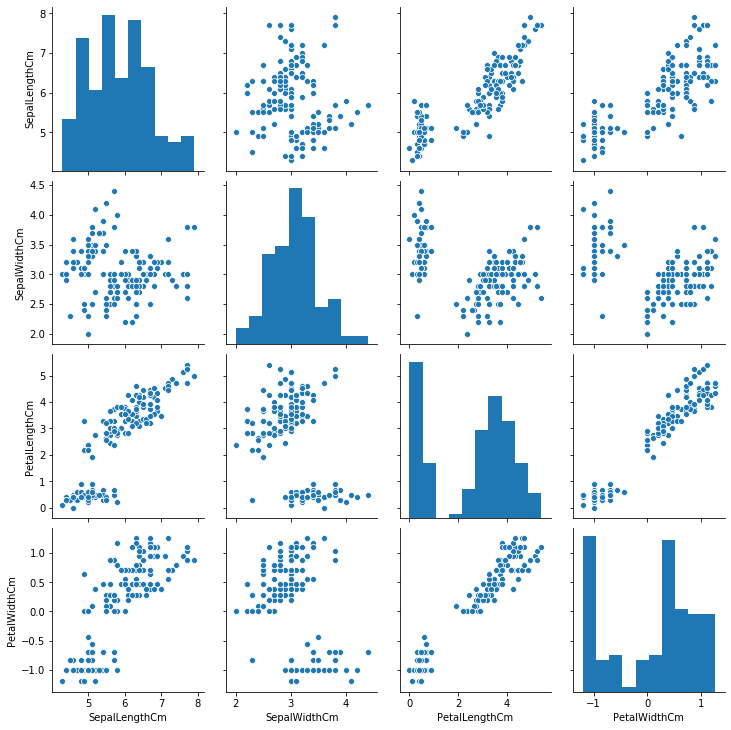

In [14]:
sns.pairplot(iris)

# Outliers

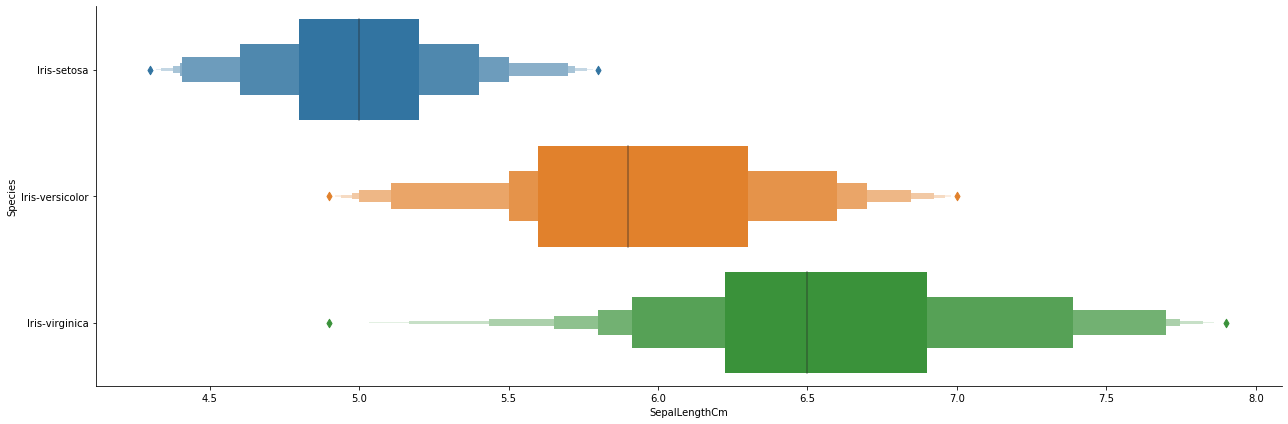

In [15]:
sns.catplot(x='SepalLengthCm',y='Species',data=iris,kind='boxen',height=6,aspect=3)

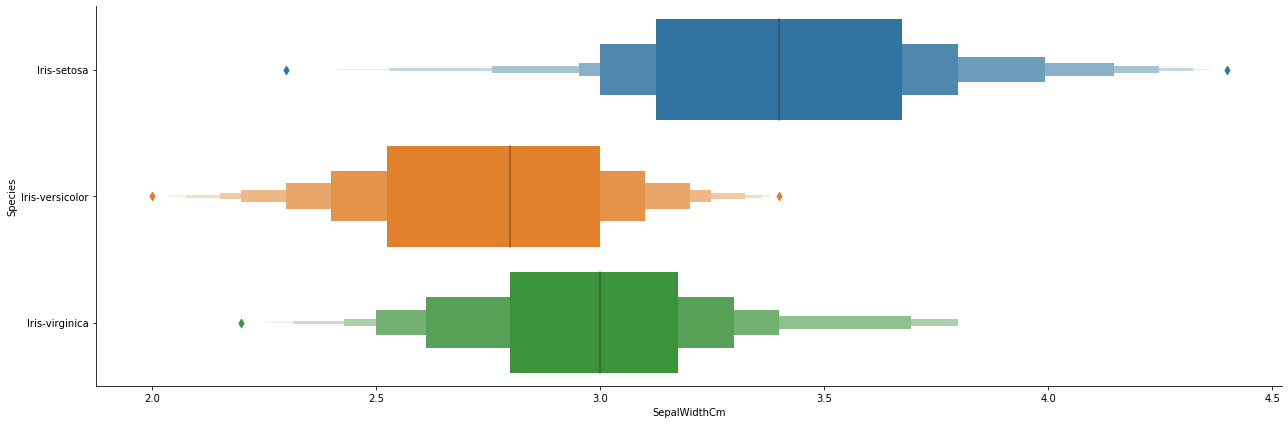

In [16]:
sns.catplot(x='SepalWidthCm',y='Species',data=iris,kind='boxen',height=6,aspect=3)

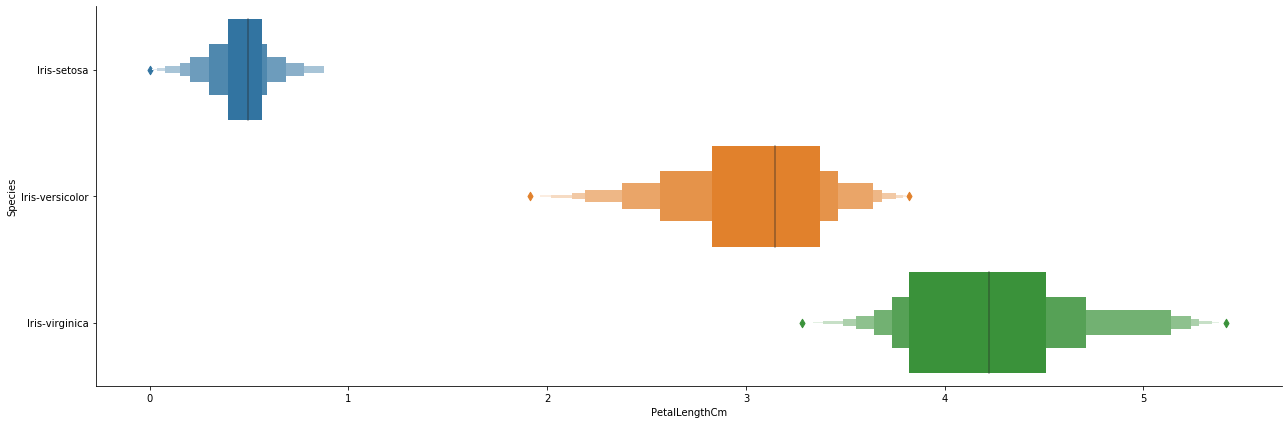

In [17]:
sns.catplot(x='PetalLengthCm',y='Species',data=iris,kind='boxen',height=6,aspect=3)

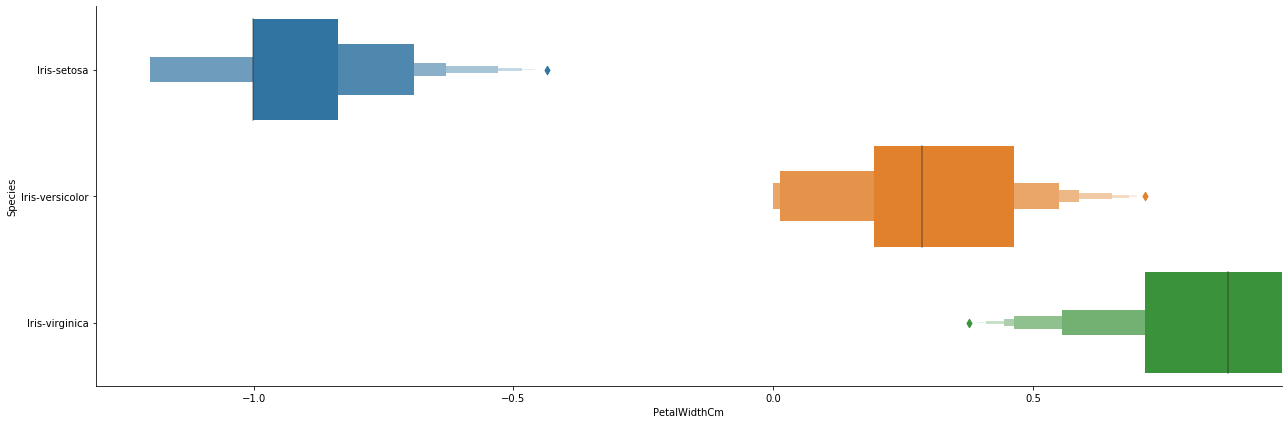

In [18]:
sns.catplot(x='PetalWidthCm',y='Species',data=iris,kind='boxen',height=6,aspect=3)

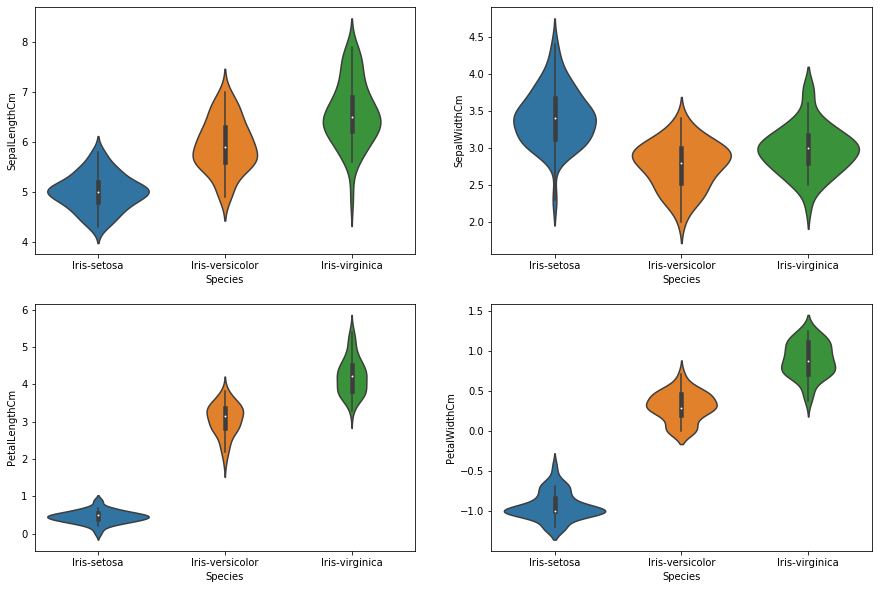

In [19]:
# Violin plot
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='SepalLengthCm',data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='SepalWidthCm', data=iris)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='PetalLengthCm', data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='PetalWidthCm', data=iris)

plt.show()

As We can see there are less number of outliers. So we do not need to worry about outliers.

# Encoding

In [20]:
iris['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

In [21]:
iris['Species'] = iris['Species'].map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})
iris.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,3.911892,1.102428,2
146,6.3,2.5,3.733071,0.794959,2
147,6.5,3.0,3.911892,0.873825,2
148,6.2,3.4,4.090241,1.102428,2
149,5.9,3.0,3.822542,0.714602,2


In [22]:
X = iris.drop(['Species'],axis=1)
y = iris['Species']

# Scaling

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train_scaled,y_train)
print('Decision Tree Created')

Decision Tree Created


In [26]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
y_pred=dtc.predict(X_test_scaled)
print(confusion_matrix(y_test,y_pred),'\n')
print(accuracy_score(y_test,y_pred),'\n')
print(classification_report(y_test,y_pred))

[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]] 

0.9666666666666667 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



# Hyperparameter Tuning
# Randomized SearchCV

In [27]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [1,2,3,4,5,7,9]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'splitter':['best','random'],
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'splitter': ['best', 'random'], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [1, 2, 3, 4, 5, 7, 9], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [28]:
dt = DecisionTreeClassifier()
dt_randomcv = RandomizedSearchCV(estimator=dt,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,random_state=1,n_jobs=-1)
# fit the randomized model
dt_randomcv.fit(X_train_scaled,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    4.7s finished


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [1, 2, 3, 4, 5, 7,
                                                              9],
                                        'splitter': ['best', 'random']},
                   random_state=1, verbose=2)

In [29]:
dt_randomcv.best_params_

{'splitter': 'best',
 'min_samples_split': 4,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 560,
 'criterion': 'gini'}

In [30]:
best_random_grid=dt_randomcv.best_estimator_

In [31]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
y_pred=best_random_grid.predict(X_test_scaled)
print(confusion_matrix(y_test,y_pred),'\n')
print(accuracy_score(y_test,y_pred),'\n')
print(classification_report(y_test,y_pred))

[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]] 

0.9666666666666667 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

